# SDSS/BOSS spectroscopic data

The SDSS dataset contains 100,000 spectra and catalog data for the same sources from the BOSS survey. 

### Spectra: `spPlate-merged.hdf5`

All of the spectra have the same rest-frame wavelength grid (things are redshifted). They have 4603 pixels, and we provide the wavelength grid, flux values, and inverse-variance (uncertainties) for each source.

### Spectroscopic catalog info: `specObj-merged.hdf5`

We provide a row-matched table of spectroscopic catalog information derived from the spectra by the SDSS pipeline. This is provided as a table stored in an HDF5 file.

### Photometric catalog info: `photoPosPlate-merged.hdf5`

We also provide a row-matched table of photometric catalog information from the SDSS imaging and derived by the SDSS photometric pipeline. This is provided as a table stored in an HDF5 file.

In [1]:
from os import path

from astropy.table import Table
import h5py
import matplotlib.pyplot as plt
plt.style.use('notebook.mplstyle')
%matplotlib inline
import numpy as np

In [2]:
data_path = '../data/'

## Spectra

The spectra are stored in 3 datasets in the `spPlate-merged.hdf5` file:

In [3]:
with h5py.File(path.join(data_path, 'sdss', 'spPlate-merged.hdf5')) as f:
    print(list(f.keys()))
    
    print(f['flux'].shape)

['flux', 'ivar', 'wave']
(100000, 4603)


The spectral flux for all objects is stored in the `'flux'` dataset as a single 2D array. There are 100000 spectra, each with 4603 pixels.

The inverse-variance (uncertainty) for the flux is stored in the `'ivar'` dataset, also as a single 2D array, with the same shape as the flux array. The inverse-variance array will be 0 where the flux data are bad.

The wavelength array is stored as a 1D array in the `'wave'` dataset: the wavelength grid is the same for all spectra.

**Example**: Let's read a random spectrum (at index 71924), and plot the wavelength, flux, and inverse-variance:

In [4]:
with h5py.File(path.join(data_path, 'sdss', 'spPlate-merged.hdf5')) as f:
    wave = f['wave'][:]
    flux = f['flux'][71924]
    ivar = f['ivar'][71924]

/Users/adrian/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


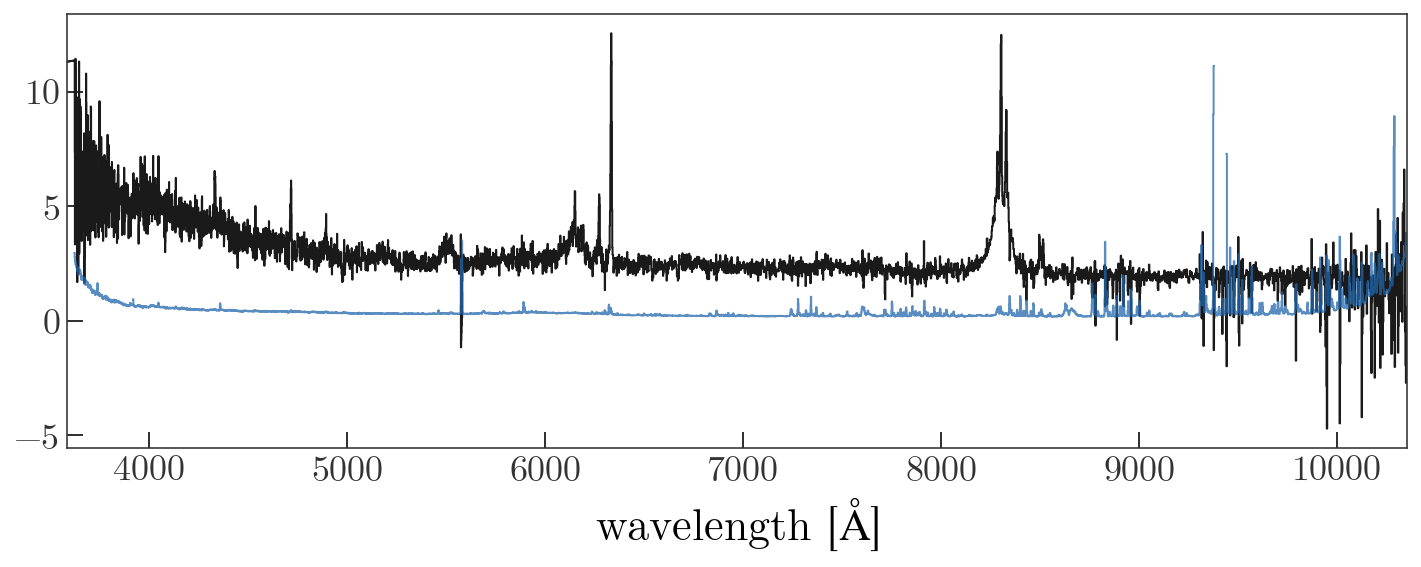

In [5]:
plt.figure(figsize=(12,4))

plt.plot(wave, flux, marker='None', linewidth=1,
         linestyle='-', drawstyle='steps-mid')
plt.plot(wave, 1/np.sqrt(ivar), marker='None', linestyle='-', 
         drawstyle='steps-mid', alpha=0.75, linewidth=1)

plt.xlim(wave.min(), wave.max())
plt.xlabel(r'wavelength [${\rm \AA}$]')

## Spectroscopic catalog data

In [6]:
specObj = Table.read(path.join(data_path, 'sdss', 'specObj-merged.hdf5'), 
                     path='specObj')
len(specObj)

100000

This table has many columns - some that might be useful as *labels* or for filtering:

* `CLASS` - the best guess of the type of object, can be "STAR", "QSO", or "GALAXY"
* `Z` and `Z_ERR` - the estimated redshift and redshift error
* `VDISP` - the stellar velocity dispersion (measured from line widths) from a galaxy spectrum
* `SN_MEDIAN` - the signal to noise. might be useful if you want to first test on only high SN sources
* `ELODIE_TEFF`, `ELODIE_LOGG`, `ELODIE_FEH` - for stars, the effective temperature, surface gravity, and metallicity measured from template spectra

In [7]:
print(specObj.colnames)

['SURVEY', 'INSTRUMENT', 'CHUNK', 'PROGRAMNAME', 'PLATERUN', 'PLATEQUALITY', 'PLATESN2', 'DEREDSN2', 'LAMBDA_EFF', 'BLUEFIBER', 'ZOFFSET', 'SNTURNOFF', 'NTURNOFF', 'SPECPRIMARY', 'SPECSDSS', 'SPECLEGACY', 'SPECSEGUE', 'SPECSEGUE1', 'SPECSEGUE2', 'SPECBOSS', 'BOSS_SPECOBJ_ID', 'SPECOBJID', 'FLUXOBJID', 'BESTOBJID', 'TARGETOBJID', 'PLATEID', 'NSPECOBS', 'FIRSTRELEASE', 'RUN2D', 'RUN1D', 'DESIGNID', 'CX', 'CY', 'CZ', 'XFOCAL', 'YFOCAL', 'SOURCETYPE', 'TARGETTYPE', 'THING_ID_TARGETING', 'THING_ID', 'PRIMTARGET', 'SECTARGET', 'LEGACY_TARGET1', 'LEGACY_TARGET2', 'SPECIAL_TARGET1', 'SPECIAL_TARGET2', 'SEGUE1_TARGET1', 'SEGUE1_TARGET2', 'SEGUE2_TARGET1', 'SEGUE2_TARGET2', 'MARVELS_TARGET1', 'MARVELS_TARGET2', 'BOSS_TARGET1', 'BOSS_TARGET2', 'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'EBOSS_TARGET_ID', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2', 'SPECTROGRAPHID', 'PLATE', 'TILE', 'MJD', 'FIBERID', 'OBJID', 'PLUG_RA', 'PLUG_DEC', 'CLASS', 'SUBCLASS', 'Z', 'Z_ERR', 'RCHI2', 'DOF', 'RCHI2DIF

**Example**: What are the possible spectral classes and how many spectra do we have of each?

In [8]:
spec_class = specObj['CLASS'].astype(str)
spec_classes = np.unique(spec_class)
for cls in spec_classes:
    print(cls, (spec_class == cls).sum())

GALAXY 52815
QSO 30774
STAR 16411


**Example**: What are the redshift distributions of all objects classified as GALAXY or QSO?

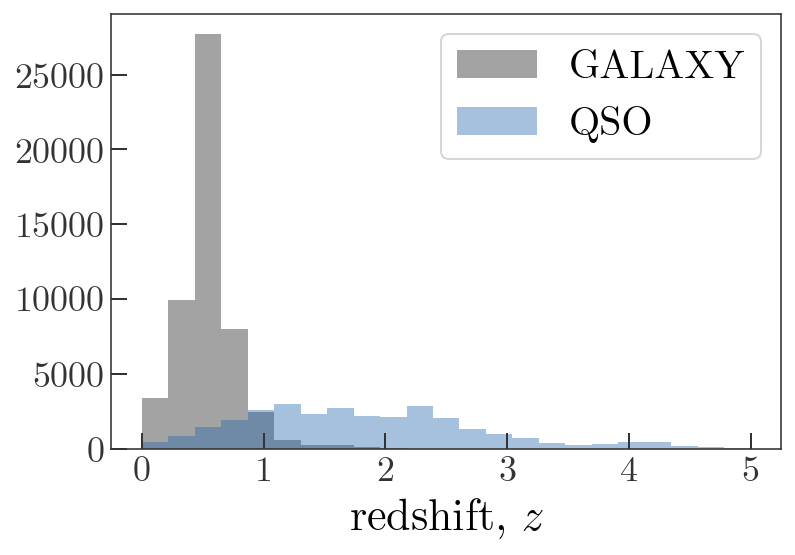

In [9]:
bins = np.linspace(0, 5, 24)

for cls in ['GALAXY', 'QSO']:
    plt.hist(specObj['Z'][specObj['CLASS'] == cls], 
             bins=bins, label=cls, alpha=0.4)
plt.legend(fontsize=20)
plt.xlabel('redshift, $z$')

## Photometric catalog data

This table also has many columns - some that might be useful as *labels* or for filtering:

* `PSFMAG` / `PSFMAGERR` - the PSF magnitudes in each of the 5 SDSS filters, $ugriz$
* `EXTINCTION` - the extinction in each of the 5 filters

In [10]:
photoPos = Table.read(path.join(data_path, 'sdss', 'photoPosPlate-merged.hdf5'), 
                      path='photoPosPlate')

In [11]:
print(photoPos.colnames)

['AB_DEV', 'AB_DEVERR', 'AB_EXP', 'AB_EXPERR', 'AIRMASS', 'APERFLUX', 'APERFLUX_IVAR', 'B', 'BALKAN_ID', 'CALIB_STATUS', 'CAMCOL', 'CLEAN', 'CLOUDCAM', 'CMODELFLUX', 'CMODELFLUX_IVAR', 'CMODELMAG', 'CMODELMAGERR', 'COLC', 'COLCERR', 'COLVDEG', 'COLVDEGERR', 'CX', 'CY', 'CZ', 'DEC', 'DECERR', 'DEVFLUX', 'DEVFLUX_IVAR', 'DEVMAG', 'DEVMAGERR', 'DEV_LNL', 'EXPFLUX', 'EXPFLUX_IVAR', 'EXPMAG', 'EXPMAGERR', 'EXP_LNL', 'EXTINCTION', 'FIBER2FLUX', 'FIBER2FLUX_IVAR', 'FIBER2MAG', 'FIBER2MAGERR', 'FIBERFLUX', 'FIBERFLUX_IVAR', 'FIBERMAG', 'FIBERMAGERR', 'FIELD', 'FIELDID', 'FLAGS', 'FLAGS2', 'FRACDEV', 'ID', 'IFIELD', 'L', 'MJD', 'MODE', 'MODELFLUX', 'MODELFLUX_IVAR', 'MODELMAG', 'MODELMAGERR', 'M_CR4', 'M_CR4_PSF', 'M_E1', 'M_E1E1ERR', 'M_E1E2ERR', 'M_E1_PSF', 'M_E2', 'M_E2E2ERR', 'M_E2_PSF', 'M_RR_CC', 'M_RR_CCERR', 'M_RR_CC_PSF', 'NCHILD', 'NDETECT', 'NEDGE', 'NMGYPERCOUNT', 'NMGYPERCOUNT_IVAR', 'NOBSERVE', 'NPROF', 'OBJC_COLC', 'OBJC_COLCERR', 'OBJC_FLAGS', 'OBJC_FLAGS2', 'OBJC_PROB_PSF', 'OB

This column has 5 elements per source, one magnitude for each of $ugriz$:

In [12]:
photoPos['PSFMAG'].shape

(100000, 5)

**Example**: Let's plot the g-r, r-i colors of all of our sources for each of the spectroscopic classes:

In [13]:
g_r = photoPos['PSFMAG'][:,1] - photoPos['PSFMAG'][:,2]
r_i = photoPos['PSFMAG'][:,2] - photoPos['PSFMAG'][:,3]

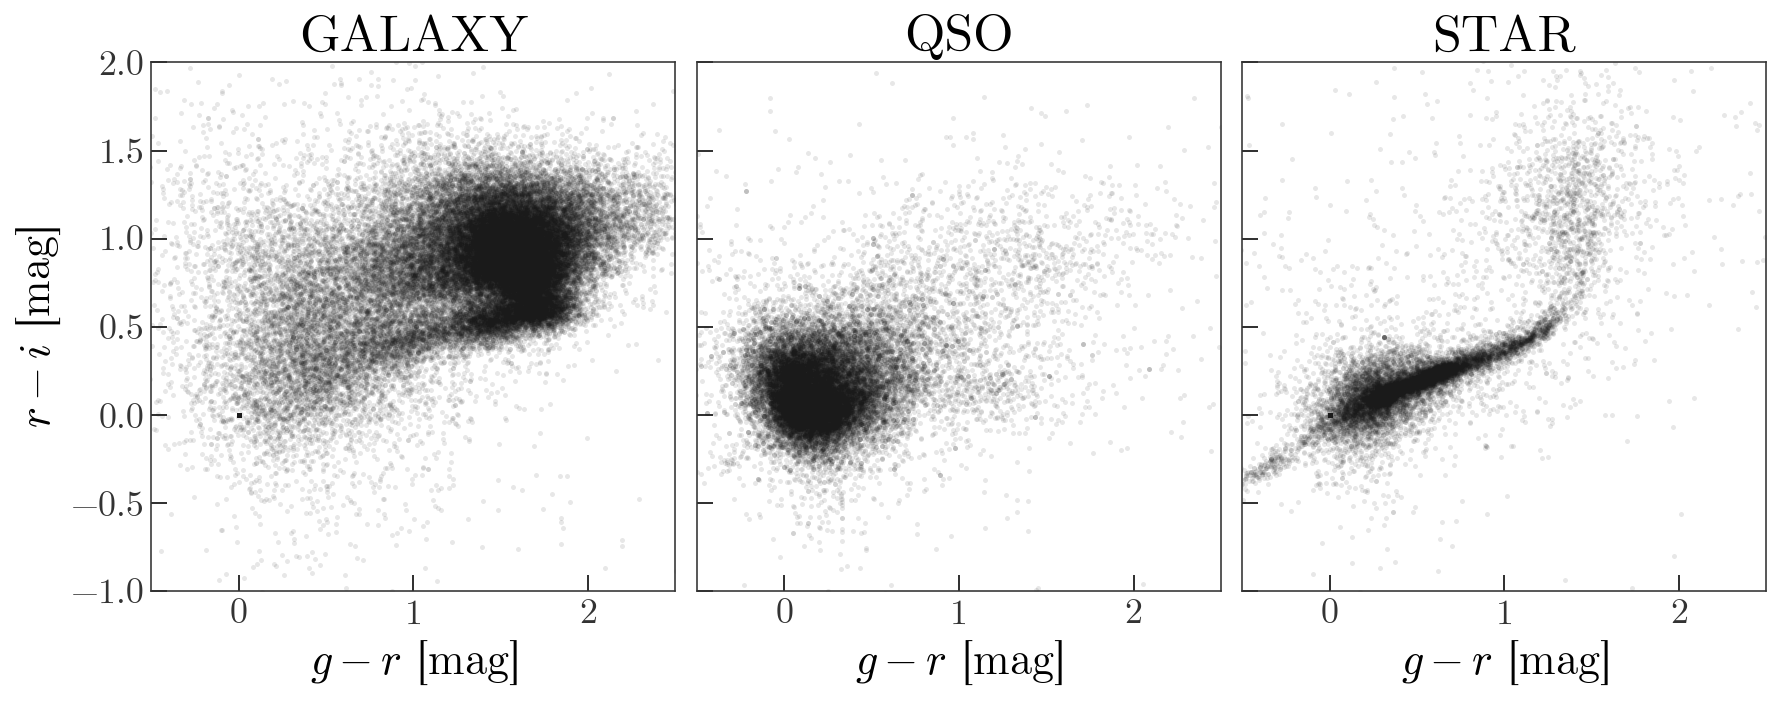

In [14]:
fig, axes = plt.subplots(1, len(spec_classes), figsize=(12.5,5), 
                         sharex=True, sharey=True)

for i, cls in enumerate(spec_classes):
    axes[i].plot(g_r[spec_class == cls], r_i[spec_class == cls], 
                 marker='.', linestyle='none', alpha=0.1)
    axes[i].set_title(cls)
    axes[i].set_xlabel('$g-r$ [mag]')

axes[0].set_xlim(-0.5, 2.5)
axes[0].set_ylim(-1, 2)

axes[0].set_ylabel('$r-i$ [mag]')

fig.tight_layout()

**Example**: Select all spectra that meet some photometric cuts

We'll define a color cut in $g-r$, $r-i$ colors and co-add all spectra in that box that are also stars:

In [15]:
color_cut = (g_r > 0.45) & (g_r < 0.55) & (r_i > 0.) & (r_i < 0.4)
print("{0} objects pass this cut".format(color_cut.sum()))

2411 objects pass this cut


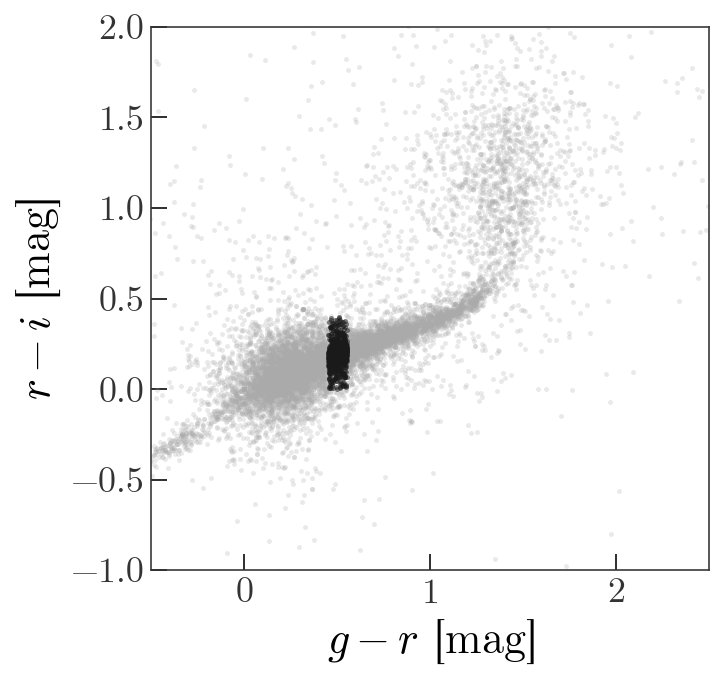

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.plot(g_r[spec_class == 'STAR'], r_i[spec_class == 'STAR'], 
        marker='.', linestyle='none', alpha=0.25, color='#aaaaaa')

ax.plot(g_r[(spec_class == 'STAR') & color_cut], 
        r_i[(spec_class == 'STAR') & color_cut], 
        marker='.', linestyle='none', alpha=0.5)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-1, 2)

ax.set_xlabel('$g-r$ [mag]')
ax.set_ylabel('$r-i$ [mag]')

Now we'll load the spectra for those objects:

In [17]:
with h5py.File(path.join(data_path, 'sdss', 'spPlate-merged.hdf5')) as f:
    wave = f['wave'][:]
    color_cut_flux = f['flux'][color_cut, :]
    color_cut_ivar = f['ivar'][color_cut, :]

In [18]:
color_cut_coadd = np.sum(color_cut_flux, axis=0)

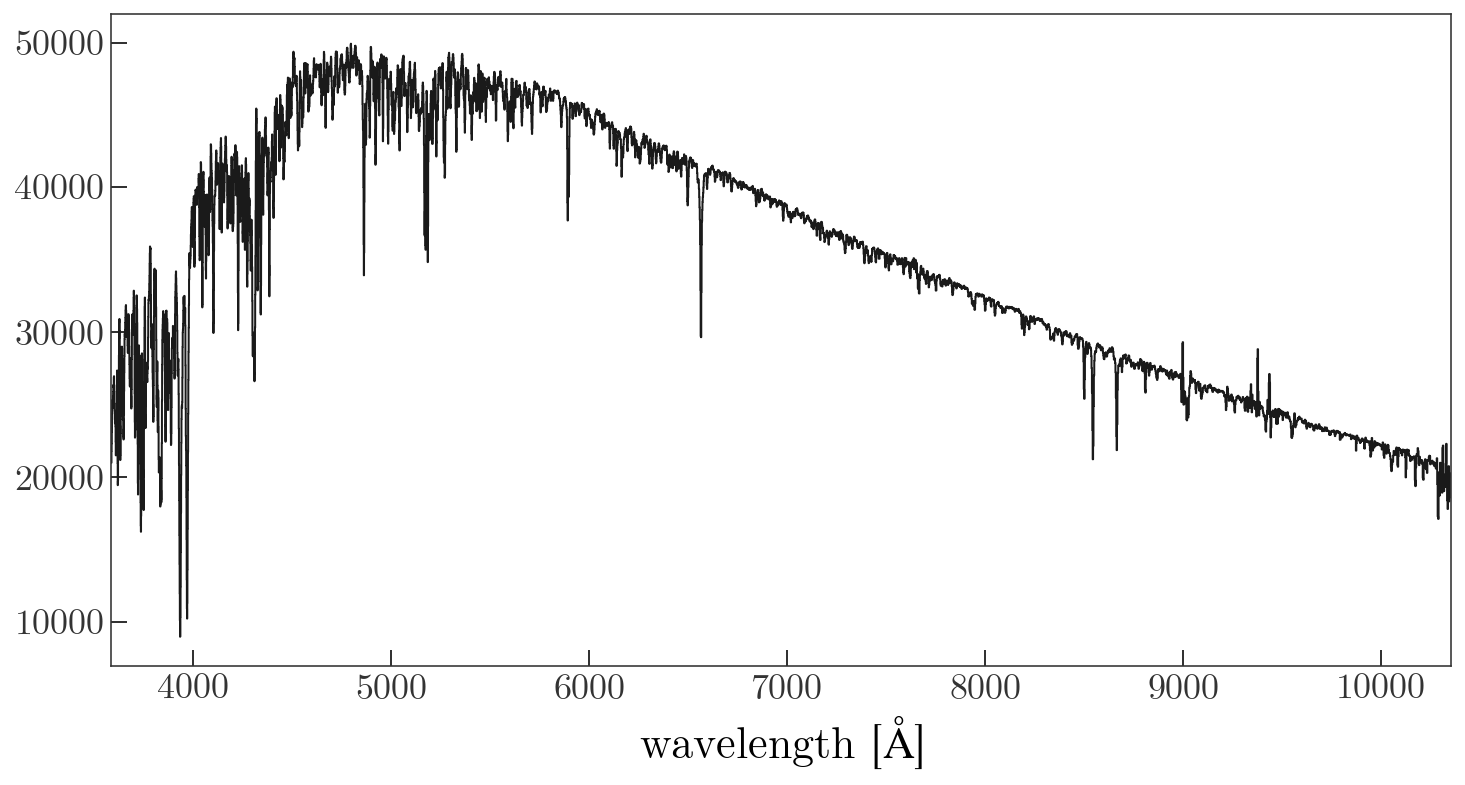

In [19]:
plt.figure(figsize=(12,6))

plt.plot(wave, color_cut_coadd, marker='None', linewidth=1,
         linestyle='-', drawstyle='steps-mid')

plt.xlim(wave.min(), wave.max())
plt.xlabel(r'wavelength [${\rm \AA}$]')